In [1]:
#The numpy and pandas libraries are used for data manipulation and analysis
#The requests library is used for sending HTTP requests to websites.
#The time library is used for pausing the script for a specified amount of time. The json library is used for working with JSON data.
#Finally, the BeautifulSoup library is used for web scraping by parsing HTML and XML files.

import numpy as np
import pandas as pd
import requests
import time
import json
from bs4 import BeautifulSoup




In [2]:
#Initial api call to business review page on Hello Peter

url = 'https://api.hellopeter.com/consumer/business/first-national-bank/reviews'

response = requests.get(url)
init_dictionary = response.json()



In [3]:
#accessing the value of the 'last_page' key in the  dictionary and adding 1 to it to determine the last page number. 

if 'last_page' in init_dictionary:
    try:
        pagination_lastpage = int(init_dictionary['last_page']) + 1
        pagination_firstpage = 0
    except ValueError:
        print("Error: 'last_page' value is not a valid integer.")
else:
    print("Error: 'last_page' key not found in dictionary.")





In [4]:
# Make request up to 3 times, with a delay of 10 seconds between attempts, 
# and breaks out of the loop if the request is successful or the maximum number of retries is reached.
import time
import requests

start = time.time()

#Blank list to which to write the Json in dictionary format for each page.
hp_dictionary_allpages = []

#persist certain parameters across requests, such as cookies, headers, and auth
session = requests.Session()


#Loop through each of the pages on Hello Peter which contains the complaints.
for x in range(pagination_firstpage, pagination_lastpage):
    url2 = init_dictionary['next_page_url'][:-1] + str((x+1))

    # Try to make the request up to three times
    for attempt in range(3):
        try:
            response2 = session.get(url2)
            response2.raise_for_status()  # Add this line to check for HTTP errors
            hp_dictionary_allpages.append(response2.json())
            break  # Exit the loop if the request was successful
        except requests.exceptions.HTTPError as e:
            if attempt < 2:
                print(f"Error: {e}. Retrying in 10 seconds...")
                time.sleep(10)
            else:
                print(f"Error: {e}. Maximum retries reached.")
                break  # Exit the loop if maximum retries reached

end = time.time()
print(f'{end - start:.2f} seconds elapsed')



Error: 524 Server Error:  for url: https://api.hellopeter.com/consumer/business/first-national-bank/reviews?page=101. Retrying in 10 seconds...
Error: 524 Server Error:  for url: https://api.hellopeter.com/consumer/business/first-national-bank/reviews?page=601. Retrying in 10 seconds...
Error: 524 Server Error:  for url: https://api.hellopeter.com/consumer/business/first-national-bank/reviews?page=820. Retrying in 10 seconds...
Error: 524 Server Error:  for url: https://api.hellopeter.com/consumer/business/first-national-bank/reviews?page=1082. Retrying in 10 seconds...
Error: 502 Server Error: Bad Gateway for url: https://api.hellopeter.com/consumer/business/first-national-bank/reviews?page=1197. Retrying in 10 seconds...


In [ ]:
#prints the keys of the first dictionary in the
print('Page data Structure:\n*************************')
for key in hp_dictionary_allpages[0].keys():
    print(key)


Page data Structure:
*************************


NameError: name 'hp_dictionary_allpages' is not defined

In [ ]:
#prints the keys of the first element (dictionary) in the data list 

print('List of columns  :\n*************************')
for key in hp_dictionary_allpages[0]['data'][0].keys():
    print(key)


List of columns  :
*************************
id
user_id
created_at
authorDisplayName
author
authorAvatar
author_id
review_title
review_rating
review_content
business_name
business_slug
permalink
replied
messages
business_logo
industry_logo
industry_name
industry_slug
status_id
nps_rating
source
is_reported
business_reporting
author_created_date
author_total_reviews_count
attachments


In [ ]:
#retrieves the value of the 'total' key from the dictionary at index 20
num_reviews = hp_dictionary_allpages[20]['total']
print(f"{num_reviews} Hallo Peter Reviews Detected")

34957 Hallo Peter Reviews Detected


In [ ]:
#Creating a dataframe with all complaints info
complaints_df = pd.DataFrame(hp_dictionary_allpages[0]['data'])
for i in range(1, pagination_lastpage-1):
    temp_df = pd.DataFrame(hp_dictionary_allpages[i]['data'])
    complaints_df = pd.concat([complaints_df, temp_df], ignore_index=True)



In [ ]:
#found out the total number of rows and columns in the data set using
complaints_df.shape

(34958, 27)

In [ ]:
#list of clumns and data types
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34958 entries, 0 to 34957
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          34958 non-null  int64 
 1   user_id                     34958 non-null  object
 2   created_at                  34958 non-null  object
 3   authorDisplayName           34958 non-null  object
 4   author                      34958 non-null  object
 5   authorAvatar                34958 non-null  object
 6   author_id                   34958 non-null  object
 7   review_title                34958 non-null  object
 8   review_rating               34958 non-null  int64 
 9   review_content              34958 non-null  object
 10  business_name               34958 non-null  object
 11  business_slug               34958 non-null  object
 12  permalink                   34958 non-null  object
 13  replied                     34958 non-null  in

In [ ]:
#Save raw data file in csv
complaints_df.to_csv('C:/Miehleketo/msc-miehleketo/data/raw/FNB_HelloPeter.csv', index=False)


complaints_df.to_csv('C:/Miehleketo/msc-miehleketo/src/data/FNB_HelloPeter.csv', index=False)


In [ ]:
# examining missing values
print("Missing values: ")
missing_values = complaints_df.isnull().mean()
print(missing_values)
print("")


Missing values: 
id                            0.000000
user_id                       0.000000
created_at                    0.000000
authorDisplayName             0.000000
author                        0.000000
authorAvatar                  0.000000
author_id                     0.000000
review_title                  0.000000
review_rating                 0.000000
review_content                0.000000
business_name                 0.000000
business_slug                 0.000000
permalink                     0.000000
replied                       0.000000
messages                      0.000000
business_logo                 0.000000
industry_logo                 0.000000
industry_name                 0.000000
industry_slug                 0.000000
status_id                     0.000000
nps_rating                    0.799674
source                        0.492791
is_reported                   0.000000
business_reporting            0.998226
author_created_date           0.000000
author_t

In [ ]:
#Make a copy of original dataframe before manipulation
FNB_df = complaints_df.copy()


In [ ]:
#list of clumns and data types
FNB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34958 entries, 0 to 34957
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          34958 non-null  int64 
 1   user_id                     34958 non-null  object
 2   created_at                  34958 non-null  object
 3   authorDisplayName           34958 non-null  object
 4   author                      34958 non-null  object
 5   authorAvatar                34958 non-null  object
 6   author_id                   34958 non-null  object
 7   review_title                34958 non-null  object
 8   review_rating               34958 non-null  int64 
 9   review_content              34958 non-null  object
 10  business_name               34958 non-null  object
 11  business_slug               34958 non-null  object
 12  permalink                   34958 non-null  object
 13  replied                     34958 non-null  in

In [ ]:
# names of the columns with empty values
columns = ['nps_rating', 'business_reporting','source']

# looping through the columns to fill the entries with NaN values with ""
for column in columns:
    FNB_df[column] = FNB_df[column].fillna("")


In [ ]:
# loop until there are no more duplicates
duplicates_exist = True
while duplicates_exist:
    # check for duplicates using a subset of columns
    subset_cols = ['id', 'created_at', 'author'] # replace with actual column names
    num_duplicates = FNB_df.duplicated(subset=subset_cols).sum()
    if num_duplicates > 0:
        # drop duplicates from dataframe
        FNB_df.drop_duplicates(subset=subset_cols, inplace=True)
    else:
        duplicates_exist = False

# print the final dataframe
print(FNB_df)



            id                               user_id           created_at  \
0      4407713  56f8b4c0-e990-11ed-92b2-6fe8199efabb  2023-05-03 11:06:25   
1      4407682  304f1ec0-8da4-11e9-92d3-1f653c110b25  2023-05-03 11:05:24   
2      4407696  29c8d900-31fa-11e8-83f4-f23c91bb6188  2023-05-03 11:01:16   
3      4407355  3054af93-31fa-11e8-83f4-f23c91bb6188  2023-05-03 09:27:36   
4      4407104  3602c257-31fa-11e8-83f4-f23c91bb6188  2023-05-03 07:45:06   
...        ...                                   ...                  ...   
34953  1624424  20153e06-31fa-11e8-83f4-f23c91bb6188  2015-01-28 10:07:00   
34954  1624408  0a965a08-31fa-11e8-83f4-f23c91bb6188  2015-01-28 10:00:00   
34955  1624344  11f51dda-31fa-11e8-83f4-f23c91bb6188  2015-01-28 09:28:00   
34956  1624326  03f8585c-31fa-11e8-83f4-f23c91bb6188  2015-01-28 09:11:00   
34957  1624288  10f924ba-31fa-11e8-83f4-f23c91bb6188  2015-01-28 08:50:00   

      authorDisplayName      author authorAvatar  \
0               Ntebo M

In [ ]:
#testing if my object has the right type of data in it
FNB_df.head()



,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,industry_name,industry_slug,status_id,nps_rating,source,is_reported,business_reporting,author_created_date,author_total_reviews_count,attachments
0,4407713,56f8b4c0-e990-11ed-92b2-6fe8199efabb,2023-05-03 11:06:25,Ntebo M,Ntebo M,,56f8b4c0-e990-11ed-92b2-6fe8199efabb,SLOW SERVICE AND MINIMAL CONSULTANT,1,"Good morning,\n\nI have been on the quey since...",...,Banking,banking,1,,WEBSITE,False,,2023-05-03,1,[]
1,4407682,304f1ec0-8da4-11e9-92d3-1f653c110b25,2023-05-03 11:05:24,Wilna C,Wilna C,,304f1ec0-8da4-11e9-92d3-1f653c110b25,Service,5,Thanks to Lucky in the assistance of opening a...,...,Banking,banking,1,,WEBSITE,False,,2019-06-13,9,[]
2,4407696,29c8d900-31fa-11e8-83f4-f23c91bb6188,2023-05-03 11:01:16,Mulalo R,Mulalo R,,29c8d900-31fa-11e8-83f4-f23c91bb6188,Being treated as an idiot,1,"On my last statement I was charged R11 182,75...",...,Banking,banking,1,,WEBSITE,False,,2016-05-18,23,[]
3,4407355,3054af93-31fa-11e8-83f4-f23c91bb6188,2023-05-03 09:27:36,morongwa K,morongwa K,,3054af93-31fa-11e8-83f4-f23c91bb6188,poor service from absa bank regarding their te...,1,I have personal loan with Absa and my account ...,...,Banking,banking,1,,WEBSITE,False,,2016-11-22,4,[]
4,4407104,3602c257-31fa-11e8-83f4-f23c91bb6188,2023-05-03 07:45:06,malefo M,malefo M,,3602c257-31fa-11e8-83f4-f23c91bb6188,Refusal to process my Funeral Claim by Southga...,1,Yesterday i went to southgate branch to proces...,...,Banking,banking,1,,WEBSITE,False,,2017-05-15,23,[]


In [ ]:
# Get the unique values in the 'review_title' column
unique_review_titles = FNB_df['review_title'].sort_values().unique()

# Print the unique values to the console
print(unique_review_titles)


['  Absa locked my digital services ' ' #BlackFriday double rewards'
 " 'Phantom' withdrawals from ABSA account using a bank card and a PIN that we did not have"
 ... '💩 service from George branch' '😠😠😠... Poor service, poor system.'
 '😡😖']


In [ ]:
# Define a function to get unique values of a column
def get_unique_values(column):
    unique_values = set()
    
    # Loop through the values in the column
    for value in column:
        # Check if the value is a float (NaN)
        if isinstance(value, float):
            unique_values.add(None)
        else:
            # Split the value by comma and space
            values = value.split(", ")
            # Loop through the split values and add them to the set of unique values
            for i in values:
                unique_values.add(i)
    
    # Convert the set of unique values to a list and return it
    return list(unique_values)

# Call the function to get the unique values in the 'review_title' column of the 'FNB_df' DataFrame
unique_review_titles = get_unique_values(FNB_df['review_title'])

# Print the unique values to the console
print(unique_review_titles)


['', 'Absa you are a let down!!!', 'ABSA takes your money without authority', 'Cashsend fee Rip-Off', 'Promote Fraud', 'FRAUDULENT DEDUCTIONS', 'CREDIT CARD ', 'Tried to cancel insurance policy', 'No Help from Absa', 'Lerato Mpatoli - Absa Life lncompetence', 'Disgusting service!', 'Failure to take notice down from ITC ', 'incompetent service!!!!', 'Disappointing service from ABSA Deceased Estates!', "DON'T OPEN ACCOUNTS WITH ABSA!!! ", 'Useless ABSA to Rica your account. Quick to freeze but not helpful to Rica account.', 'Extremely Poor Communication', 'Double debit debitorder.  Shocking!!!!!!', 'Absa refuses to provide information on investments.', 'SENT FROM PILLAR TO POST ', 'Extended warranty added without consent', 'Damp and damaged', 'credit card bill', 'powersurge ', 'ABSA BANK  CLIENT SERVICE AND CUSTOMER RESOLUTION CENTRE ARE A JOKE', 'Not Allowing me register a claim', 'Not prepared to assist if urgent', 'Debit order information', 'Ref: ********** - Simple statement request 

In [ ]:
# Count the frequency of each review_title and show the top 5
review_counts = FNB_df['review_title'].value_counts()
print(review_counts.head())


Bad service         210
Poor service        162
Absa                 95
Pathetic service     85
Bad Service          83
Name: review_title, dtype: int64


In [ ]:

# check for and remove leading/trailing whitespace for columns with string data type
str_cols = FNB_df.select_dtypes(include=[object]).columns.tolist()
for col in str_cols:
    if FNB_df[col].dtype == 'object':
        FNB_df[col] = FNB_df[col].fillna('').astype(str).str.strip()






In [ ]:
#Separate created date to time,day,month and year 
FNB_df['Date'] = pd.DatetimeIndex(FNB_df['created_at']).date
FNB_df['Month'] = pd.DatetimeIndex(FNB_df['created_at']).month_name()
FNB_df['Year'] = pd.DatetimeIndex(FNB_df['created_at']).year
FNB_df['Time'] = pd.DatetimeIndex(FNB_df['created_at']).time


In [ ]:
FNB_df.head()


,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,source,is_reported,business_reporting,author_created_date,author_total_reviews_count,attachments,Date,Month,Year,Time
0,4407713,56f8b4c0-e990-11ed-92b2-6fe8199efabb,2023-05-03 11:06:25,Ntebo M,Ntebo M,,56f8b4c0-e990-11ed-92b2-6fe8199efabb,SLOW SERVICE AND MINIMAL CONSULTANT,1,"Good morning,\n\nI have been on the quey since...",...,WEBSITE,False,,2023-05-03,1,[],2023-05-03,May,2023,11:06:25
1,4407682,304f1ec0-8da4-11e9-92d3-1f653c110b25,2023-05-03 11:05:24,Wilna C,Wilna C,,304f1ec0-8da4-11e9-92d3-1f653c110b25,Service,5,Thanks to Lucky in the assistance of opening a...,...,WEBSITE,False,,2019-06-13,9,[],2023-05-03,May,2023,11:05:24
2,4407696,29c8d900-31fa-11e8-83f4-f23c91bb6188,2023-05-03 11:01:16,Mulalo R,Mulalo R,,29c8d900-31fa-11e8-83f4-f23c91bb6188,Being treated as an idiot,1,"On my last statement I was charged R11 182,75...",...,WEBSITE,False,,2016-05-18,23,[],2023-05-03,May,2023,11:01:16
3,4407355,3054af93-31fa-11e8-83f4-f23c91bb6188,2023-05-03 09:27:36,morongwa K,morongwa K,,3054af93-31fa-11e8-83f4-f23c91bb6188,poor service from absa bank regarding their te...,1,I have personal loan with Absa and my account ...,...,WEBSITE,False,,2016-11-22,4,[],2023-05-03,May,2023,09:27:36
4,4407104,3602c257-31fa-11e8-83f4-f23c91bb6188,2023-05-03 07:45:06,malefo M,malefo M,,3602c257-31fa-11e8-83f4-f23c91bb6188,Refusal to process my Funeral Claim by Southga...,1,Yesterday i went to southgate branch to proces...,...,WEBSITE,False,,2017-05-15,23,[],2023-05-03,May,2023,07:45:06


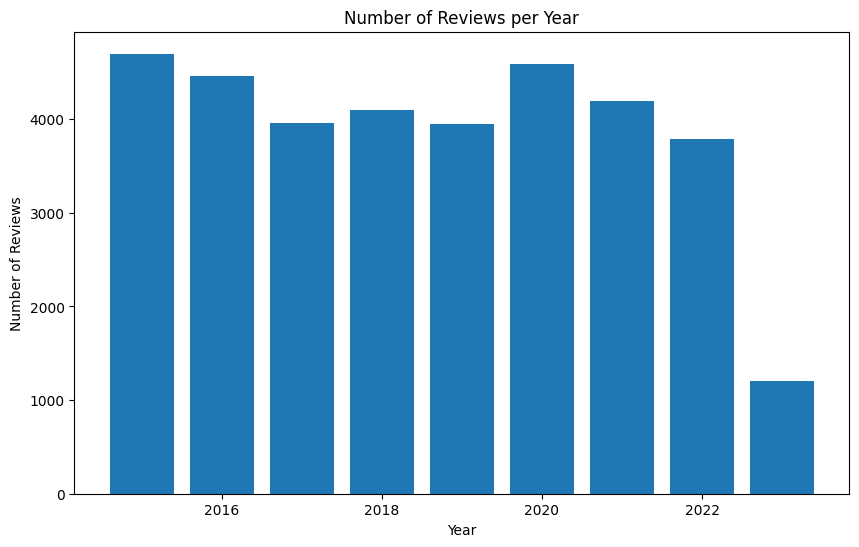

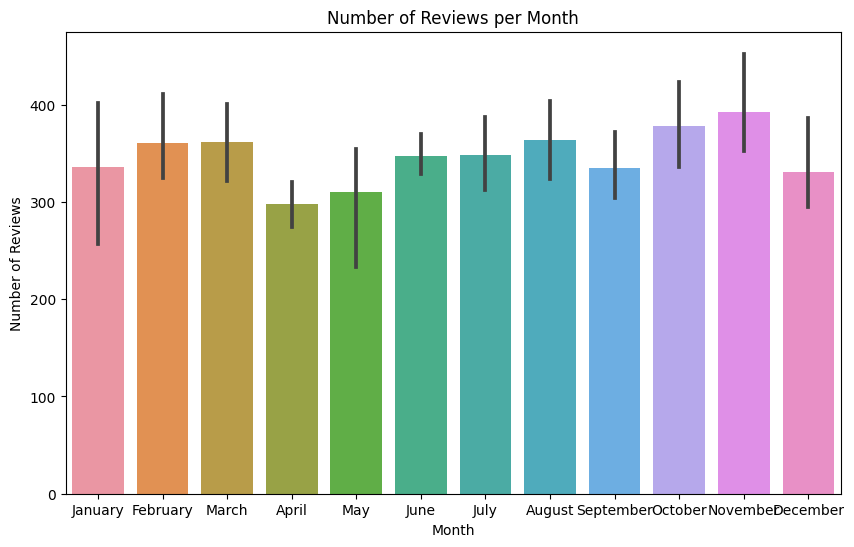

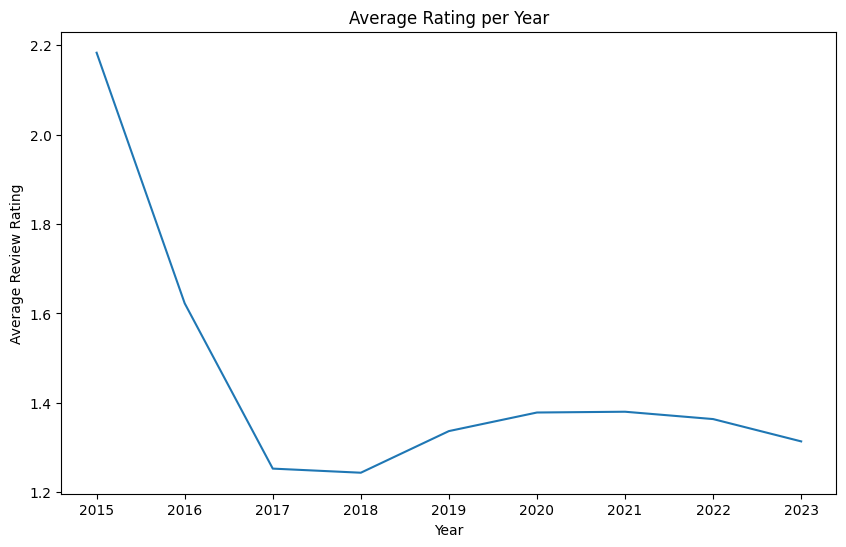

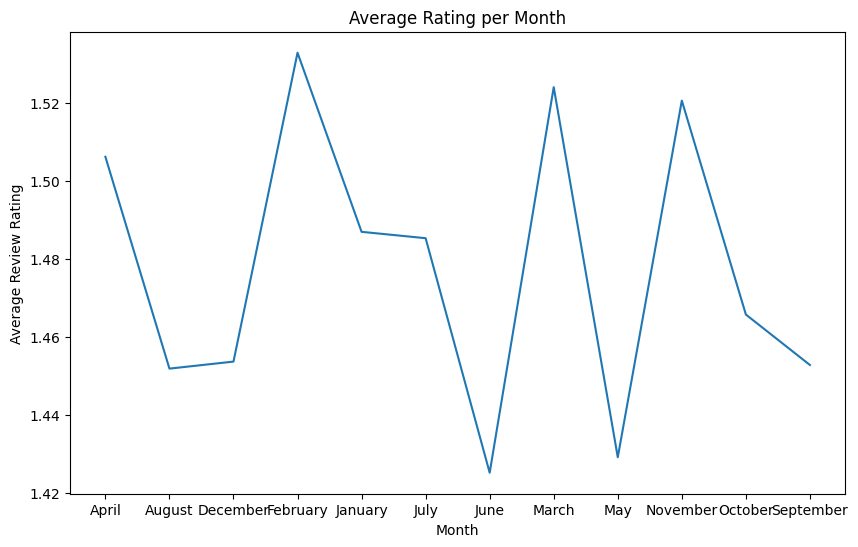

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Convert 'Date' column to datetime format
FNB_df['Date'] = pd.to_datetime(FNB_df['Date'])

# Calculate the number of reviews per year
reviews_per_year = FNB_df.groupby(FNB_df['Date'].dt.year).size()

# Calculate the number of reviews per month
reviews_per_month = FNB_df.set_index('Date').resample('MS').size()

# Plot a bar chart of reviews per year
plt.figure(figsize=(10,6))
plt.bar(reviews_per_year.index, reviews_per_year.values)
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

# Create a new DataFrame with a datetime index and resample by month
reviews_per_month = FNB_df.set_index('Date').resample('MS').size().reset_index(name='count')

# Sort the index in calendar order
reviews_per_month['Month'] = pd.Categorical(reviews_per_month['Date'].dt.strftime('%B'), categories=calendar.month_name[1:], ordered=True)

# Plot a bar chart of reviews per month
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='count', data=reviews_per_month)
plt.title('Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

# Calculate the average rating per year
avg_rating_per_year = FNB_df.groupby(FNB_df['Date'].dt.year)['review_rating'].mean()

# Plot a line chart of average rating per year
plt.figure(figsize=(10,6))
plt.plot(avg_rating_per_year.index, avg_rating_per_year.values)
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Review Rating')
plt.show()

# Calculate the average rating per month
avg_rating_per_month = FNB_df.groupby(FNB_df['Date'].dt.month_name())['review_rating'].mean()

# Plot a line chart of average rating per month
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_rating_per_month.index, y=avg_rating_per_month.values)
plt.title('Average Rating per Month')
plt.xlabel('Month')
plt.ylabel('Average Review Rating')
plt.show()


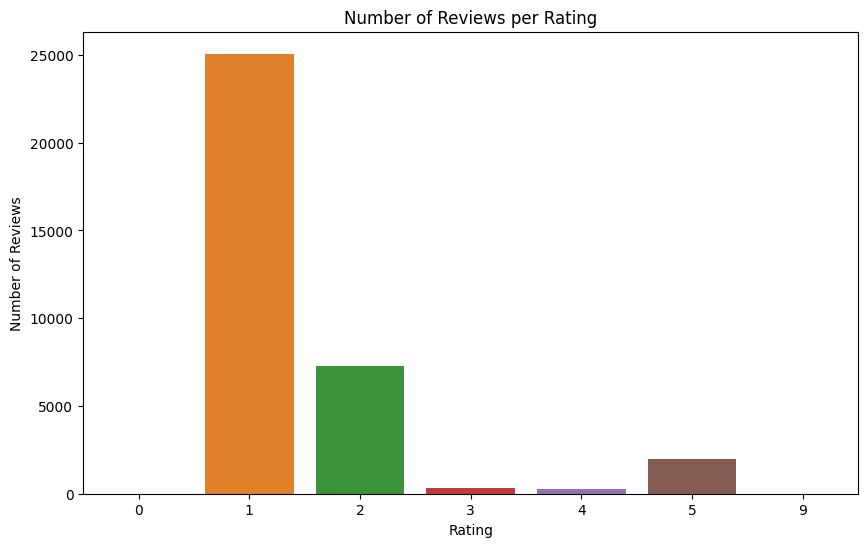

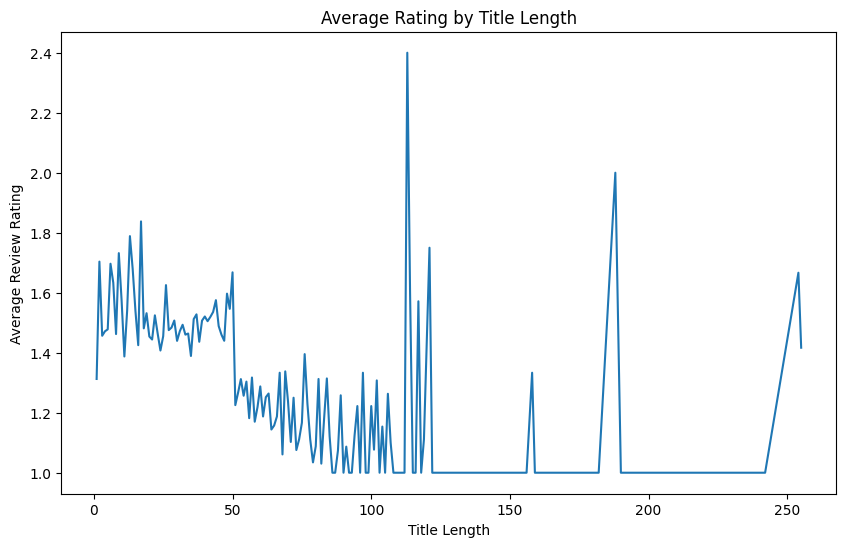

In [ ]:


# Remove leading/trailing whitespace from review_title column
FNB_df['review_title'] = FNB_df['review_title'].str.strip()

# Count the number of reviews per rating
reviews_per_rating = FNB_df['review_rating'].value_counts()

# Plot a bar chart of reviews per rating
plt.figure(figsize=(10,6))
sns.barplot(x=reviews_per_rating.index, y=reviews_per_rating.values)
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Calculate the average rating per title length
FNB_df['title_length'] = FNB_df['review_title'].str.len()
avg_rating_by_title_length = FNB_df.groupby('title_length')['review_rating'].mean()

# Plot a line chart of average rating by title length
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_rating_by_title_length.index, y=avg_rating_by_title_length.values)
plt.title('Average Rating by Title Length')
plt.xlabel('Title Length')
plt.ylabel('Average Review Rating')
plt.show()



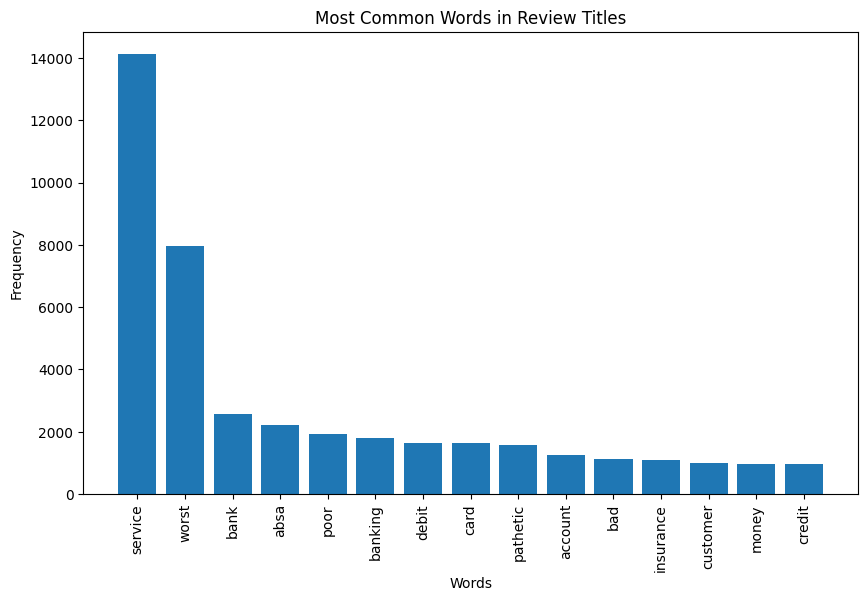

In [ ]:
#To find the most common words mentioned in the FNB_df dataframe
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Create a CountVectorizer object
cv = CountVectorizer(stop_words='english', max_features=15)

# Fit and transform the review_title column
title_words = cv.fit_transform(FNB_df['review_title'])

# Get the feature names (i.e., the most common words)
words = cv.vocabulary_.keys()

# Sum the counts for each word
word_counts = title_words.sum(axis=0)

# Create a dictionary of word counts
word_count_dict = dict(zip(words, word_counts.tolist()[0]))

# Sort the dictionary in descending order by value
sorted_word_count_dict = dict(sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True))

# Plot the most common words
plt.figure(figsize=(10,6))
plt.bar(sorted_word_count_dict.keys(), sorted_word_count_dict.values())
plt.xticks(rotation=90)
plt.title('Most Common Words in Review Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Create a new column indicating whether a review has been replied to by the business
FNB_df['is_replied'] = FNB_df['replied'].notnull()

# Count the number of reviews that have been replied to by the business
num_replied_reviews = FNB_df['is_replied'].sum()

print(f"Number of reviews replied to by the business: {num_replied_reviews}")



Number of reviews replied to by the business: 34951


<Axes: xlabel='review_rating'>

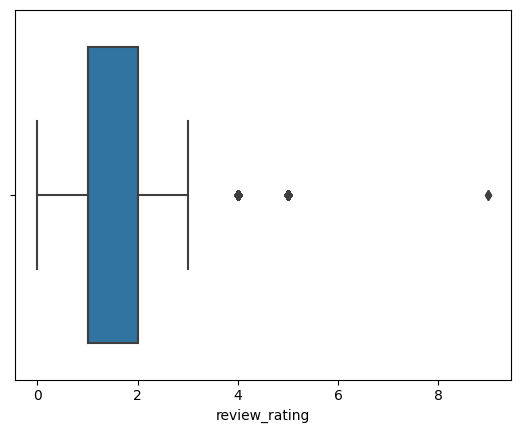

In [ ]:
#build a review_rating overview
import seaborn as sns

# Create a boxplot of review ratings
sns.boxplot(x=FNB_df['review_rating'])


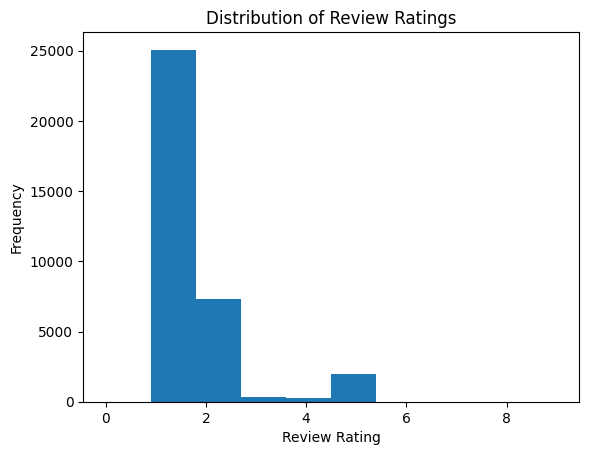

In [ ]:
#build a Distribution of review ratings 

import matplotlib.pyplot as plt

# Create a histogram of the review ratings
plt.hist(FNB_df['review_rating'], bins=10)

# Set the title and axis labels
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()



<Axes: xlabel='review_rating', ylabel='count'>

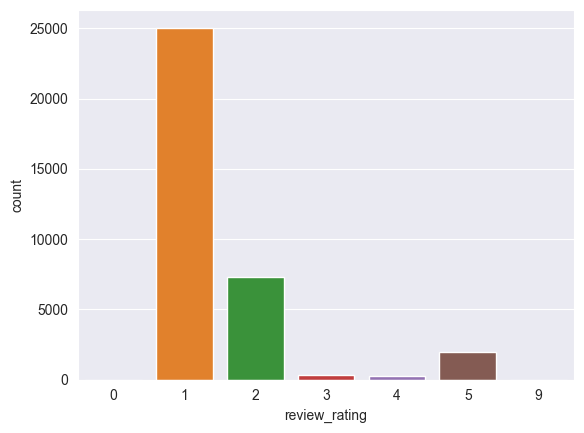

In [ ]:
#build a Review volume ratings

import seaborn as sns

sns.set_style('darkgrid')
sns.countplot(x='review_rating', data=FNB_df)


In [ ]:
#perform sentiment analysis on the FNB_df

from textblob import TextBlob

# Define a function to get the sentiment polarity of a text
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis function to the review_content column
FNB_df['sentiment_polarity'] = FNB_df['review_content'].apply(get_sentiment_polarity)

# Print the average sentiment polarity
print("Average sentiment polarity:", FNB_df['sentiment_polarity'].mean())


Average sentiment polarity: -0.013079148938707855


In [ ]:
FNB_df.head()

,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,author_created_date,author_total_reviews_count,attachments,Date,Month,Year,Time,title_length,is_replied,sentiment_polarity
0,4407713,56f8b4c0-e990-11ed-92b2-6fe8199efabb,2023-05-03 11:06:25,Ntebo M,Ntebo M,,56f8b4c0-e990-11ed-92b2-6fe8199efabb,SLOW SERVICE AND MINIMAL CONSULTANT,1,"Good morning,\n\nI have been on the quey since...",...,2023-05-03,1,[],2023-05-03,May,2023,11:06:25,35,True,0.088333
1,4407682,304f1ec0-8da4-11e9-92d3-1f653c110b25,2023-05-03 11:05:24,Wilna C,Wilna C,,304f1ec0-8da4-11e9-92d3-1f653c110b25,Service,5,Thanks to Lucky in the assistance of opening a...,...,2019-06-13,9,[],2023-05-03,May,2023,11:05:24,7,True,0.211111
2,4407696,29c8d900-31fa-11e8-83f4-f23c91bb6188,2023-05-03 11:01:16,Mulalo R,Mulalo R,,29c8d900-31fa-11e8-83f4-f23c91bb6188,Being treated as an idiot,1,"On my last statement I was charged R11 182,75...",...,2016-05-18,23,[],2023-05-03,May,2023,11:01:16,25,True,0.146212
3,4407355,3054af93-31fa-11e8-83f4-f23c91bb6188,2023-05-03 09:27:36,morongwa K,morongwa K,,3054af93-31fa-11e8-83f4-f23c91bb6188,poor service from absa bank regarding their te...,1,I have personal loan with Absa and my account ...,...,2016-11-22,4,[],2023-05-03,May,2023,09:27:36,61,True,-0.144898
4,4407104,3602c257-31fa-11e8-83f4-f23c91bb6188,2023-05-03 07:45:06,malefo M,malefo M,,3602c257-31fa-11e8-83f4-f23c91bb6188,Refusal to process my Funeral Claim by Southga...,1,Yesterday i went to southgate branch to proces...,...,2017-05-15,23,[],2023-05-03,May,2023,07:45:06,55,True,-0.080208


Number of reviews replied to by the business: 34951


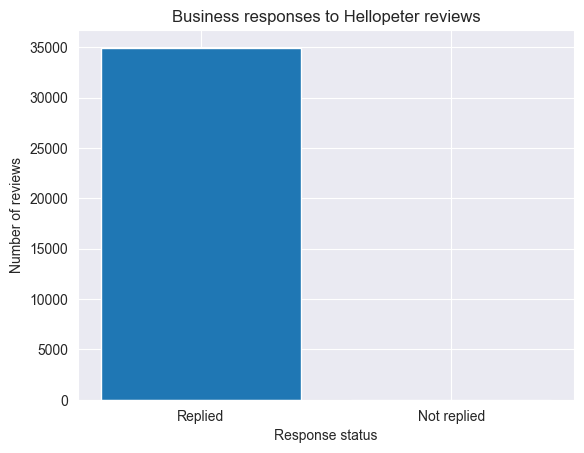

In [ ]:
#Business responses

# Create a new column indicating whether a review has been replied to by the business
FNB_df['is_replied'] = FNB_df['replied'].notnull()

# Count the number of reviews that have been replied to by the business
num_replied_reviews = FNB_df['is_replied'].sum()

print(f"Number of reviews replied to by the business: {num_replied_reviews}")

# Plot the results
import matplotlib.pyplot as plt

plt.bar(['Replied', 'Not replied'], [num_replied_reviews, len(FNB_df) - num_replied_reviews])
plt.title('Business responses to Hellopeter reviews')
plt.xlabel('Response status')
plt.ylabel('Number of reviews')
plt.show()


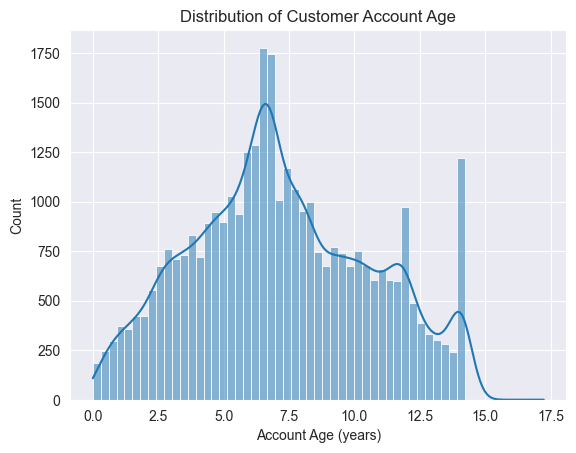

In [ ]:
# analyze customer demographics of hellopeter


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Convert author_created_date to datetime
FNB_df['author_created_date'] = pd.to_datetime(FNB_df['author_created_date'])

# Calculate the age of the account in years
FNB_df['account_age'] = (datetime.datetime.now() - FNB_df['author_created_date']).dt.days / 365

# Plot a histogram of account age
sns.histplot(data=FNB_df, x='account_age', kde=True)
plt.title('Distribution of Customer Account Age')
plt.xlabel('Account Age (years)')
plt.ylabel('Count')
plt.show()


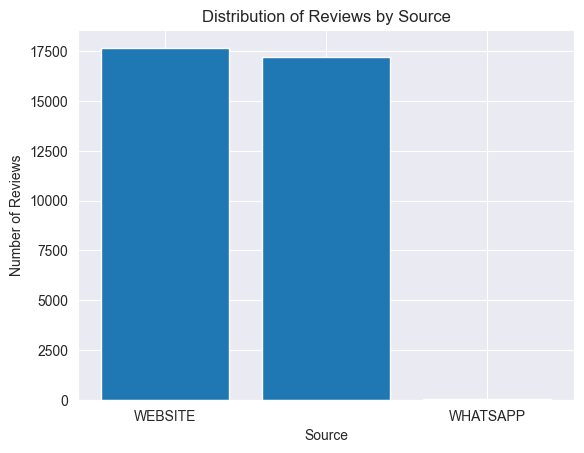

In [ ]:
#analyze the source in the Hellopeter dataframe

import matplotlib.pyplot as plt

# Count the number of reviews from each source
source_counts = FNB_df['source'].value_counts()

# Plot the distribution using a bar chart
plt.bar(source_counts.index, source_counts.values)
plt.title('Distribution of Reviews by Source')
plt.xlabel('Source')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
print(FNB_df["source"].unique())

['WEBSITE' 'WHATSAPP' '']


In [ ]:
#Most used words in the review

import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Concatenate the review_title, review_content, and industry_name columns to create a new column called "text"
FNB_df['text'] = FNB_df['review_title'] + ' ' + FNB_df['review_content'] + ' ' + FNB_df['industry_name']

# Remove any punctuation and convert all text to lowercase
FNB_df['text'] = FNB_df['text'].str.lower().str.replace('[^\w\s]', '', regex=True)



# Tokenize the text by splitting it into individual words
FNB_df['tokens'] = FNB_df['text'].apply(nltk.word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
FNB_df['tokens'] = FNB_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Count the frequency of each word
word_freq = Counter()
FNB_df['tokens'].apply(lambda x: word_freq.update(x))

# Sort the words in descending order by their frequency
top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 words and their frequencies
for word, freq in top_words:
    print(f"{word}: {freq}")


absa: 83978
banking: 43580
account: 36574
bank: 25501
service: 22888
card: 19853
money: 17467
get: 17093
call: 16787
told: 14550


In [ ]:
#perform cluster analysis on the FNB_df dataframe

import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select relevant columns
FNB_df.dropna(inplace=True)

cluster_df = FNB_df[['review_rating', 'review_content', 'business_name', 'industry_name']].copy()

# Drop rows with missing data
cluster_df.dropna(inplace=True)

# Preprocess text data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    tokens = [t for t in tokens if t not in stop_words]  # remove stop words
    stems = [stemmer.stem(t) for t in tokens]  # stem
    return ' '.join(stems)

cluster_df['review_content'] = cluster_df['review_content'].apply(preprocess_text)

# Convert text data to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cluster_df['review_content'])

# Determine optimal number of clusters
inertias = []
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # set n_init to suppress warning
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    if k > 2:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot elbow plot
plt.plot(range(2, 21), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette score plot
plt.plot(range(3, 21), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Perform clustering with optimal number of clusters
n_clusters = 5  # chosen based on elbow plot and silhouette score
kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=0) # set n_init to suppress warning
kmeans.fit(X)

# Add cluster labels to dataframe
cluster_df['cluster'] = kmeans.labels_

# Display summary statistics of clusters
print(cluster_df.groupby('cluster').agg({
    'review_rating': ['count', 'mean'],
    'business_name': pd.Series.mode,
    'industry_name': pd.Series.mode
}))


c:\Users\miehl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miehl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miehl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miehl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [ ]:
#Save processed data in csv
FNB_df.to_csv('C:/Miehleketo/msc-miehleketo/data/processed/ABSA_HelloPeter_processed.csv', index=False)

FNB_df.to_csv('C:/Miehleketo/msc-miehleketo/src/data/ABSA_HelloPeter_processed.csv', index=False)

NameError: name 'Hellopeter_df' is not defined